In [1]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

## Dicionário de Dados

| Variável           | Descrição                                                                                   | Tipo         |
|--------------------|--------------------------------------------------------------------------------------------|--------------|
| customerID         | Identificador único do cliente                                                             | Categórica   |
| gender             | Gênero do cliente (Female/Male)                                                            | Categórica   |
| SeniorCitizen      | Indica se o cliente é idoso (1) ou não (0)                                                 | Numérica     |
| Partner            | Indica se o cliente possui parceiro(a) (Yes/No)                                            | Categórica   |
| Dependents         | Indica se o cliente possui dependentes (Yes/No)                                            | Categórica   |
| tenure             | Meses de permanência do cliente                                                            | Numérica     |
| PhoneService       | Indica se o cliente possui serviço telefônico (Yes/No)                                     | Categórica   |
| MultipleLines      | Indica se o cliente possui múltiplas linhas telefônicas                                    | Categórica   |
| InternetService    | Tipo de serviço de internet (DSL/Fiber optic/No)                                           | Categórica   |
| OnlineSecurity     | Indica se o cliente possui segurança online (Yes/No/No internet service)                   | Categórica   |
| OnlineBackup       | Indica se o cliente possui backup online (Yes/No/No internet service)                      | Categórica   |
| DeviceProtection   | Indica se o cliente possui proteção de dispositivo (Yes/No/No internet service)            | Categórica   |
| TechSupport        | Indica se o cliente possui suporte técnico (Yes/No/No internet service)                    | Categórica   |
| StreamingTV        | Indica se o cliente possui serviço de streaming de TV (Yes/No/No internet service)         | Categórica   |
| StreamingMovies    | Indica se o cliente possui serviço de streaming de filmes (Yes/No/No internet service)     | Categórica   |
| Contract           | Tipo de contrato do cliente (Month-to-month/One year/Two year)                             | Categórica   |
| PaperlessBilling   | Indica se o cliente utiliza faturamento sem papel (Yes/No)                                 | Categórica   |
| PaymentMethod      | Método de pagamento do cliente                                                             | Categórica   |
| MonthlyCharges     | Valor cobrado mensalmente do cliente                                                       | Numérica     |
| TotalCharges       | Valor total cobrado do cliente                                                             | Numérica     |
| Churn              | Indica se o cliente deixou a empresa (Yes/No)                                              | Categórica   |


## Analise exploratoria

In [2]:
# importando o dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# verificando nulos
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.Churn.value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

- *73% dos dados do dataset não fizeram churn e 26% nao fizeram. Me parece que temos um desbalanceamento nas classes*

In [7]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()

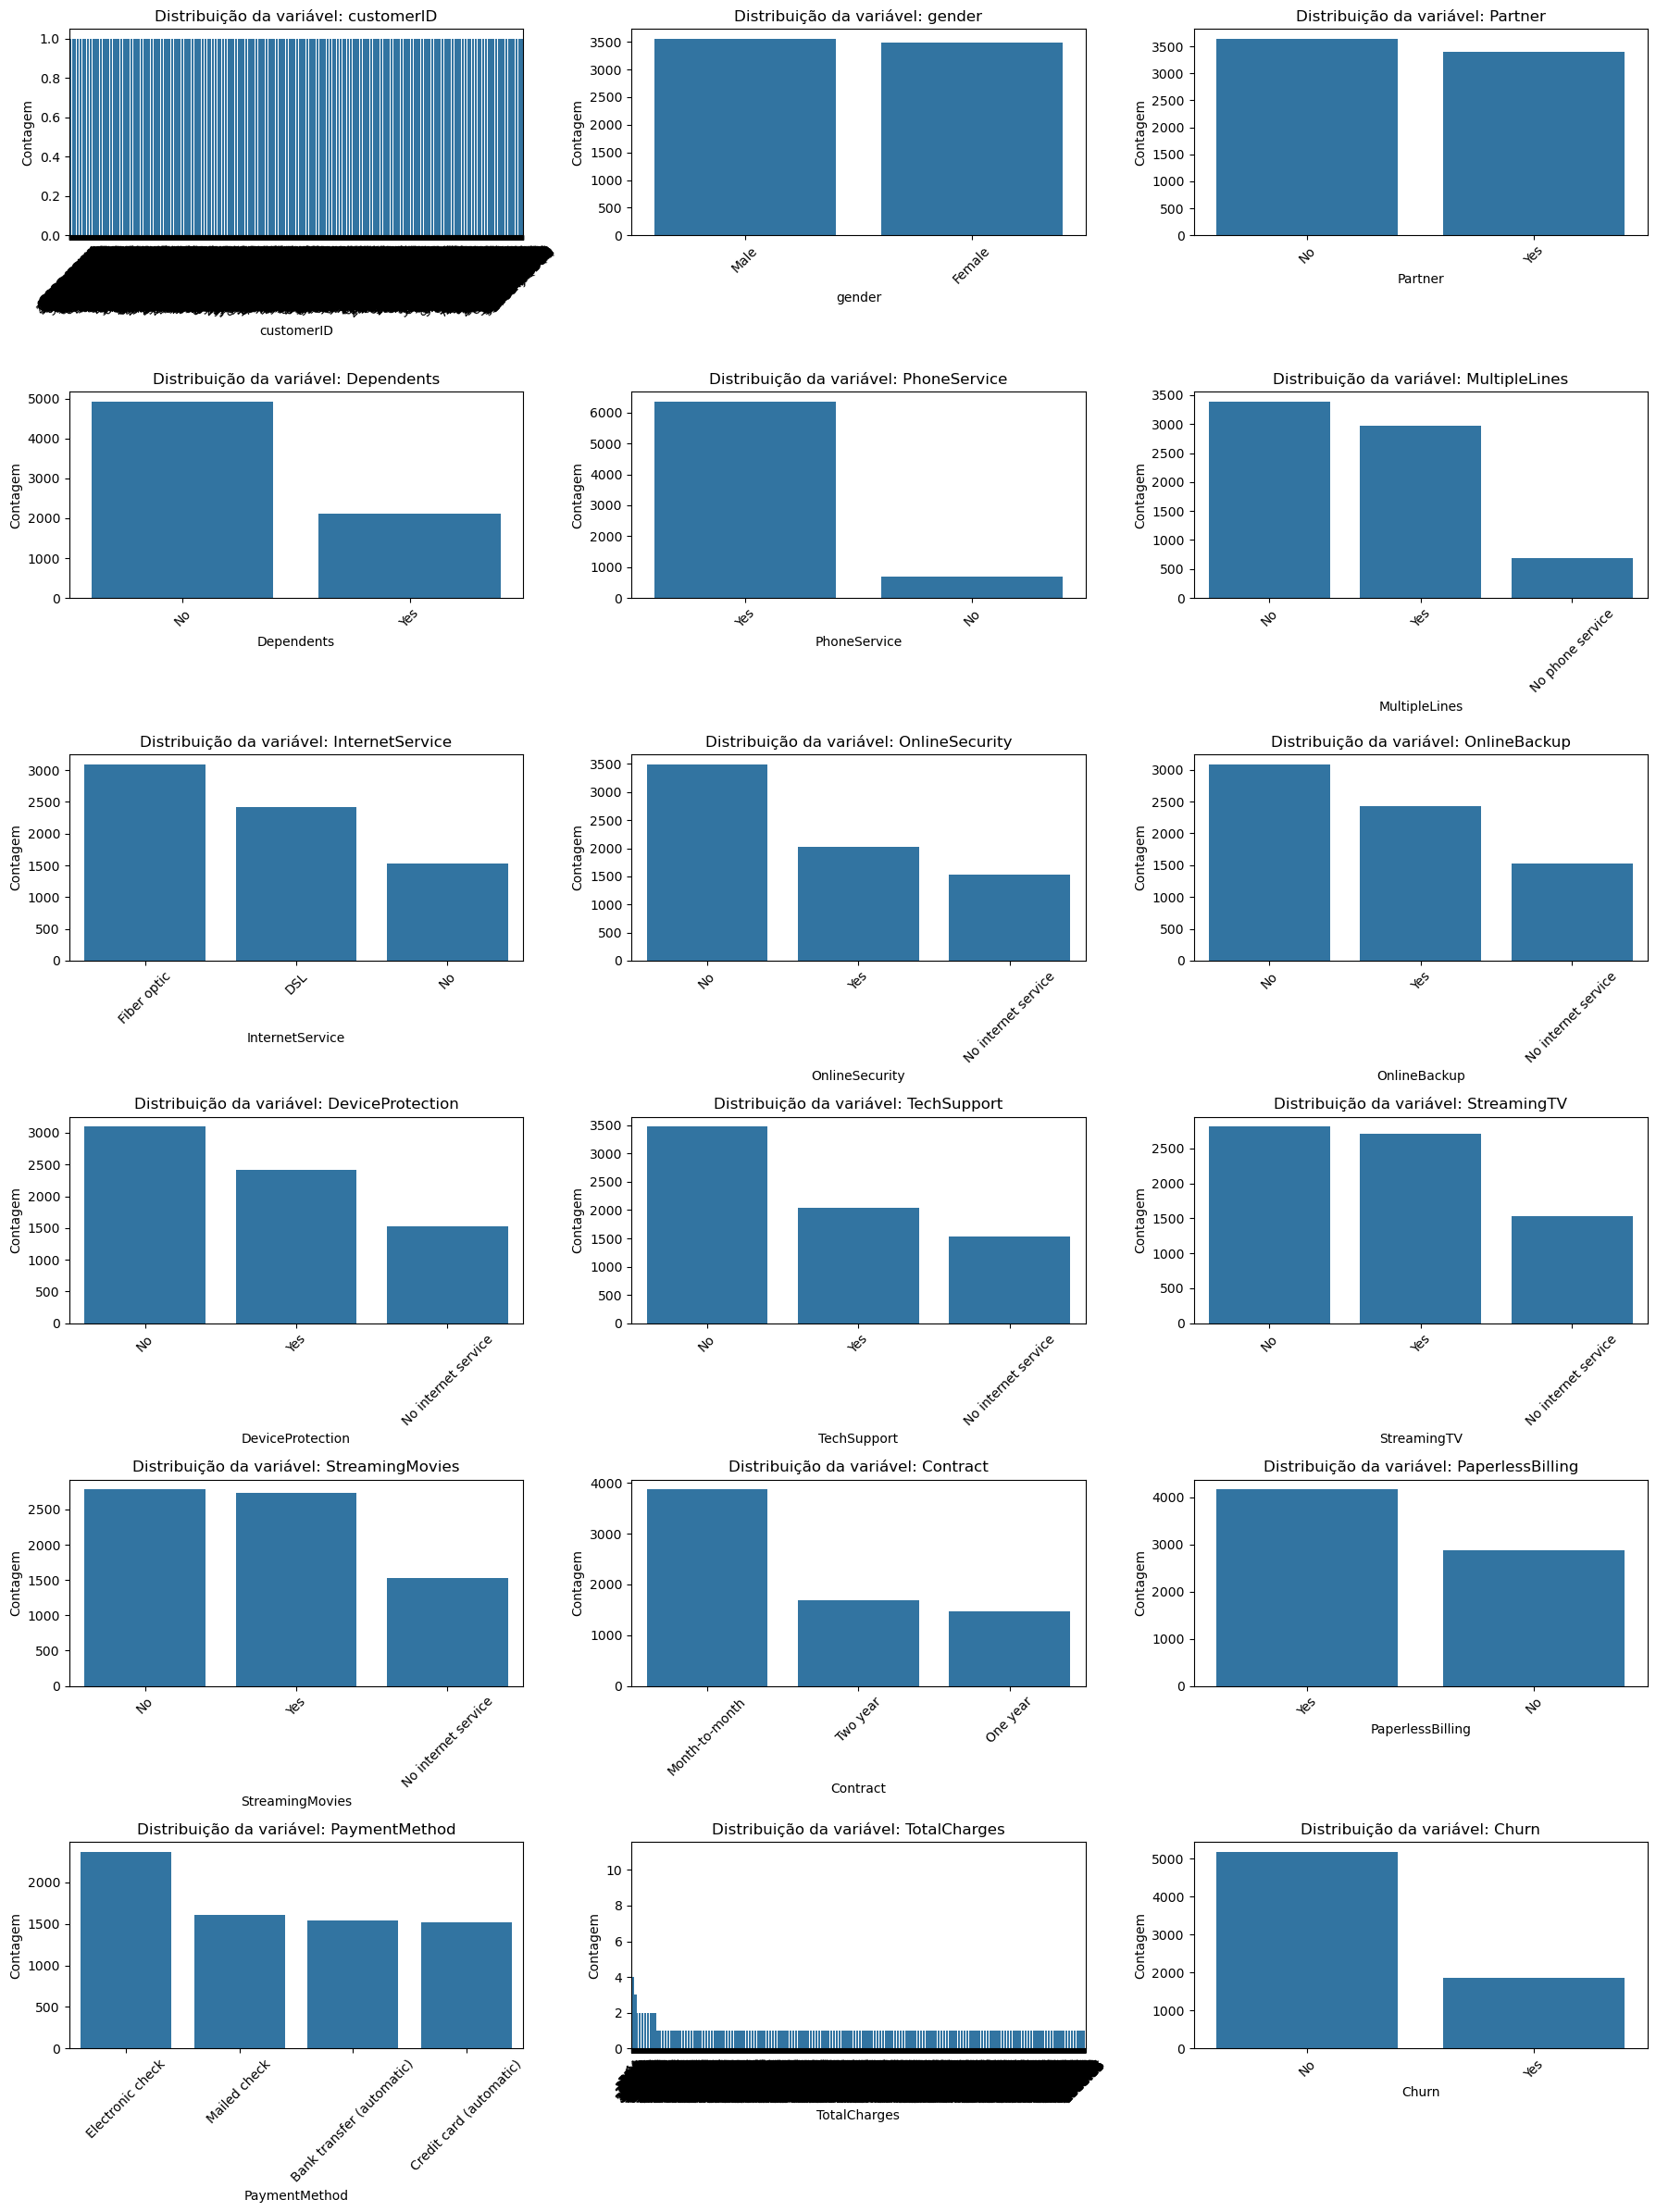

In [8]:
fig, axes = plt.subplots(6, 3, figsize=(18, 4*6))

for idx, col in enumerate(categoricas):
    ax = axes[idx // 3, idx % 3]
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
    ax.set_title(f'Distribuição da variável: {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel(col)
    ax.set_ylabel('Contagem')

plt.tight_layout()
plt.show()

In [9]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [10]:
numericas

['SeniorCitizen', 'tenure', 'MonthlyCharges']

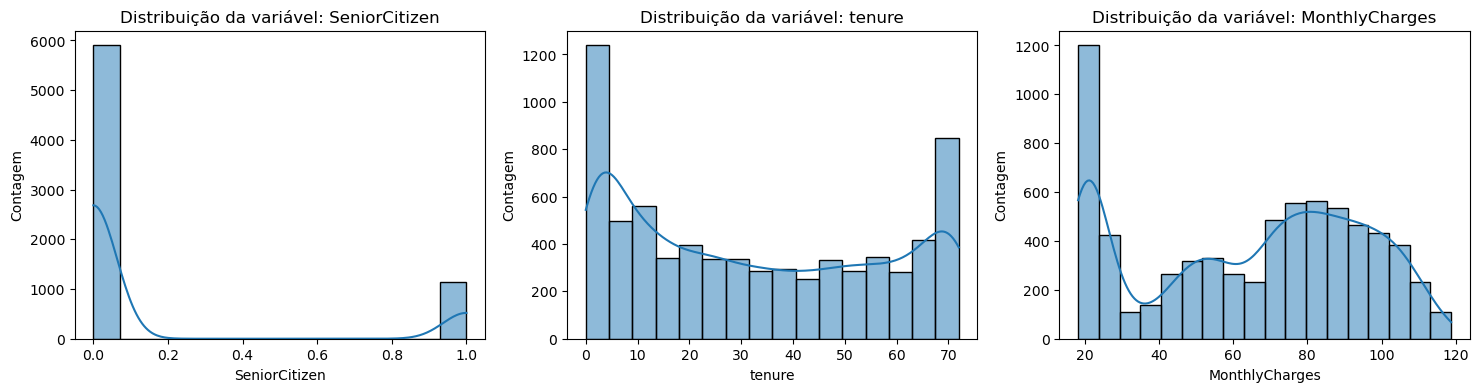

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for idx, i in enumerate(numericas):
    ax = axes[idx]
    sns.histplot(df[i], kde=True, ax=ax)
    ax.set_title(f'Distribuição da variável: {i}')
    ax.set_xlabel(i)
    ax.set_ylabel('Contagem')

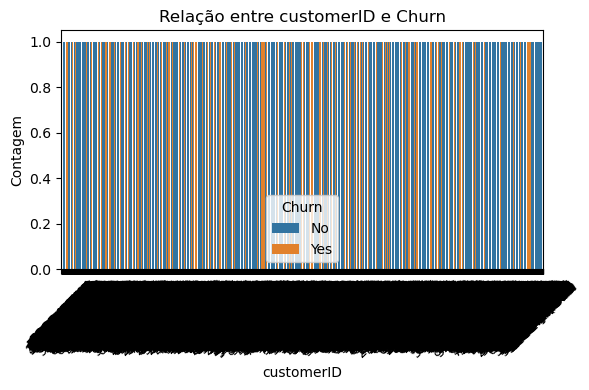

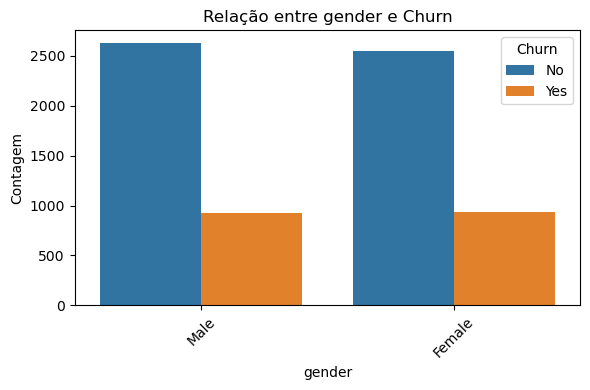

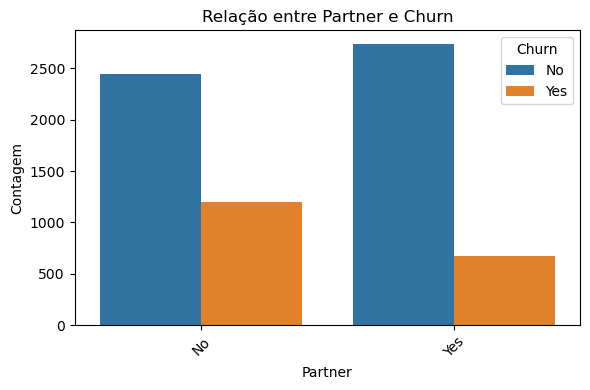

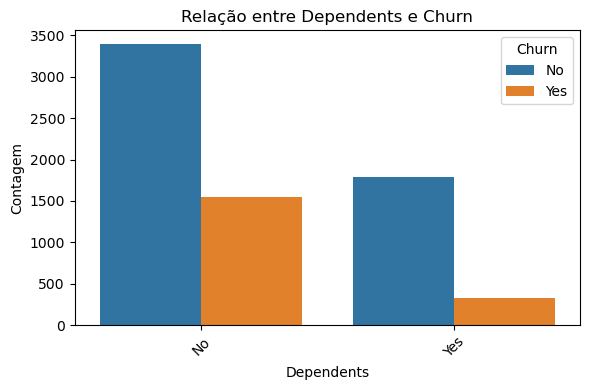

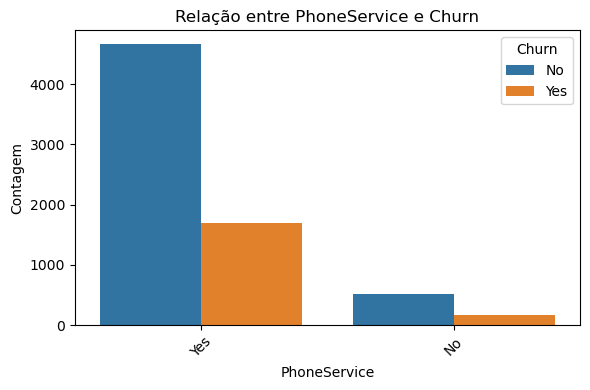

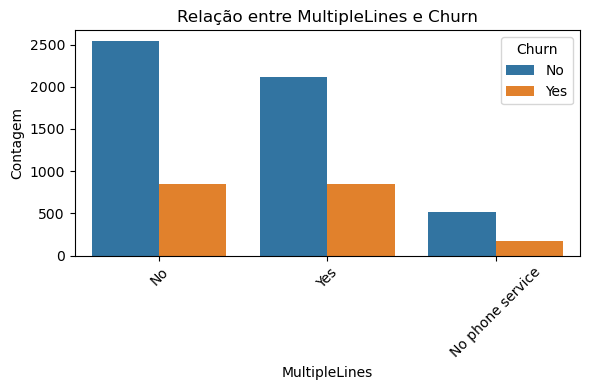

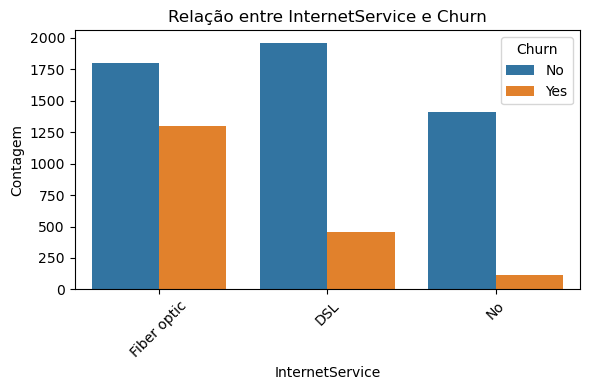

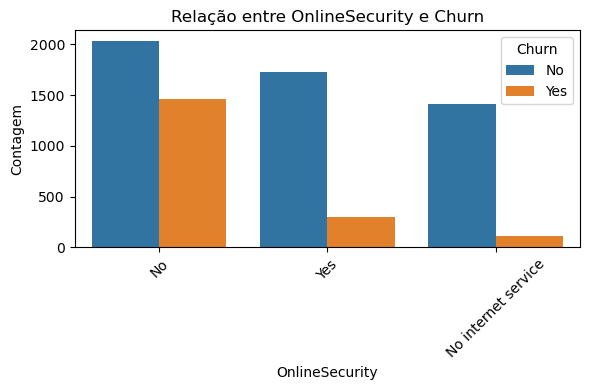

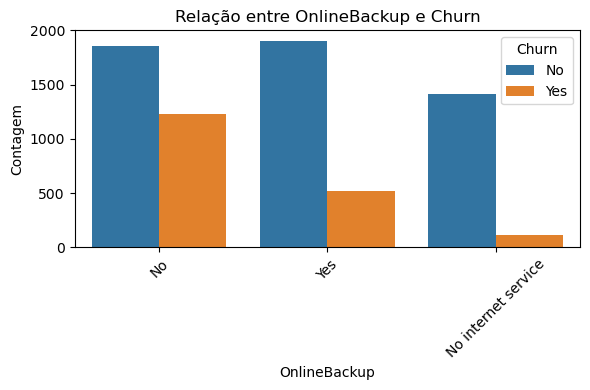

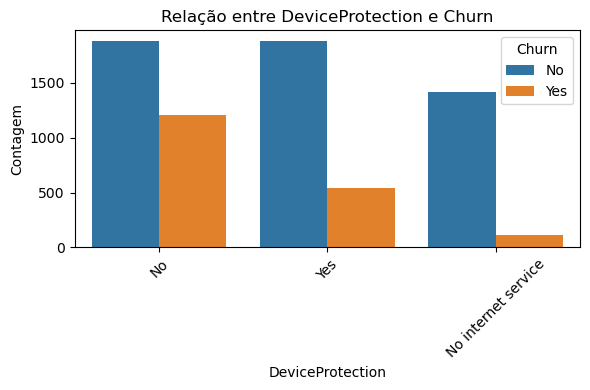

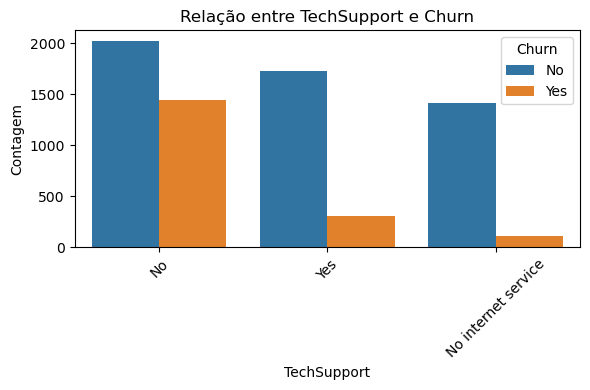

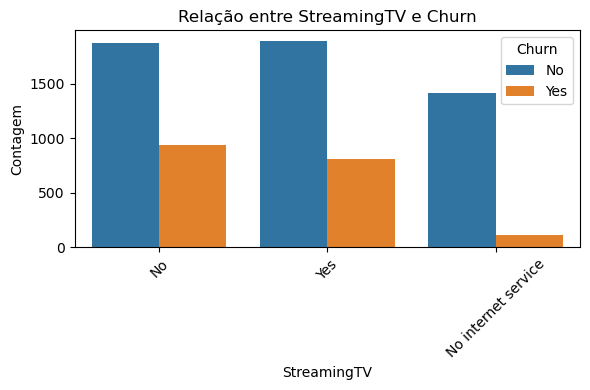

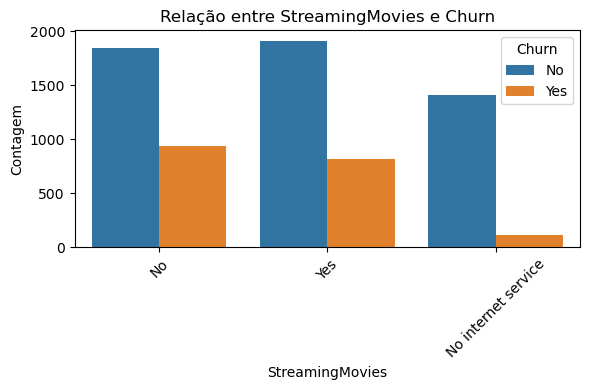

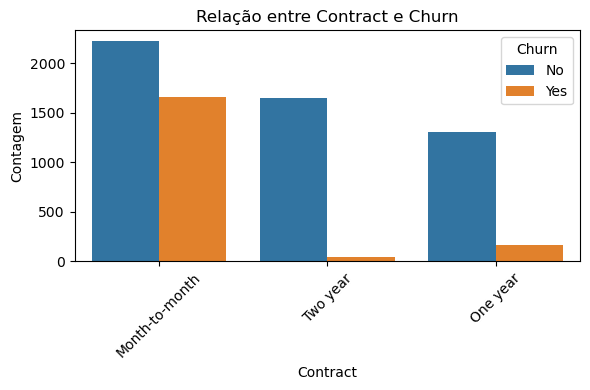

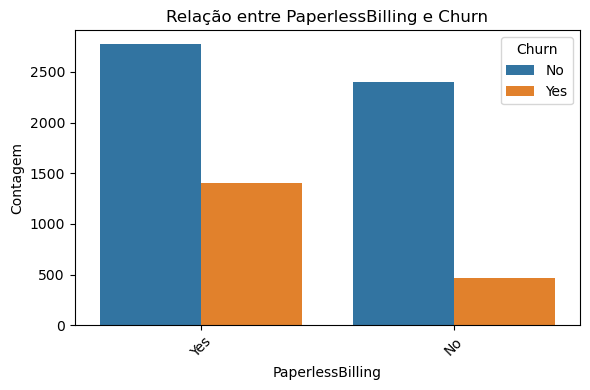

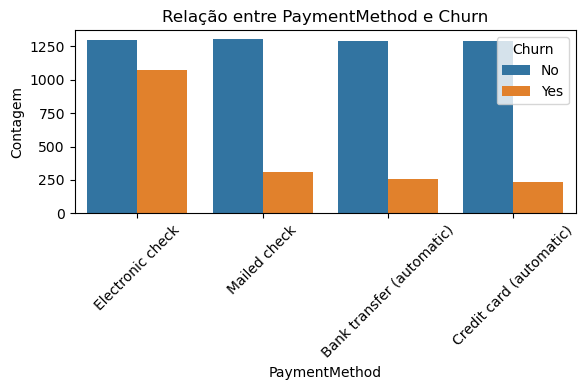

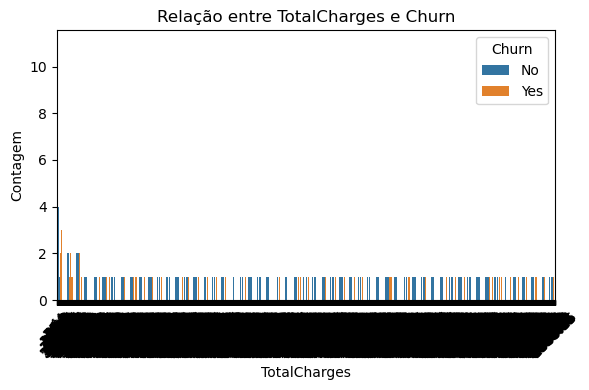

In [12]:
# Variáveis categóricas
for col in categoricas:
    if col != 'Churn':
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, hue='Churn', order=df[col].value_counts().index)
        plt.title(f'Relação entre {col} e Churn')
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.legend(title='Churn')
        plt.tight_layout()
        plt.show()


- *As pessoas que contrataram serviços adicionais como onlinesecurity, onlinebackup e techsupport tem menos propensão da dar churn.*
- *Percebe-se que pessoas com contratos maiores como o de um ano e principalmente o de dois anos tem menor taxa de churn*
- *Pessoas que o metodo de pagamento é eletronico tem mais propensão a dar churn se comparado com pessoas que pagam automatimamente pelo cartão de credito ou debito automatico.*

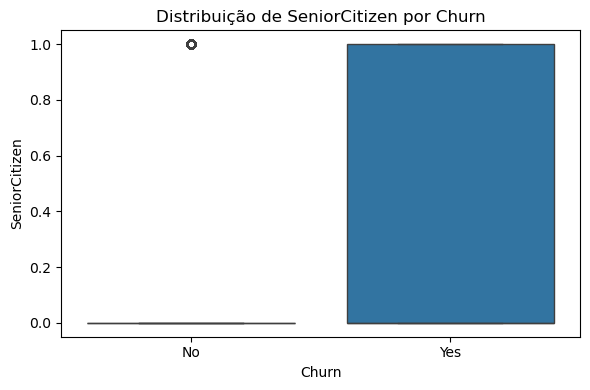

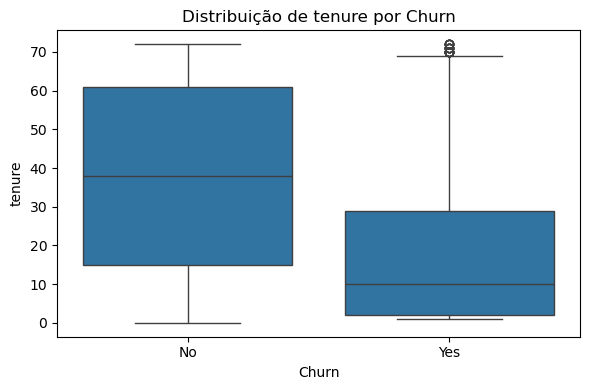

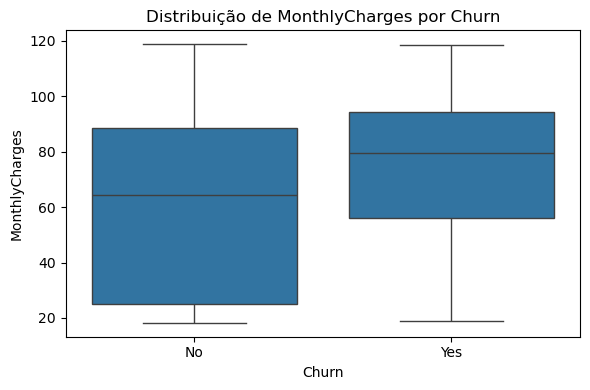

In [13]:
# Variáveis numéricas
for col in numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

- *Existe uma tendencia dos clientes novos darem churn se compararmos a clientes mais antigos.*
- *Existe também uma tendencia maior a clientes com valores de contas mais altos a dar churn.*

## Observações e Insights Preliminares

Abaixo estão os principais padrões encontrados durante a análise exploratória do dataset. Esses insights serão úteis tanto para a modelagem preditiva quanto para recomendações futuras para o negócio.

---

### 1. Serviços adicionais e menor propensão ao churn

Clientes que contrataram serviços como:
- OnlineSecurity
- OnlineBackup
- TechSupport

tendem a permanecer mais tempo com a empresa. Esses serviços parecem aumentar o engajamento e o valor percebido, reduzindo a chance de cancelamento.

**💡 Recomendação inicial:** incentivar a adesão desses serviços como estratégia de retenção.

---

### 2. Tipo de contrato influencia o churn

Clientes com:
- Contrato **mensal** → maior taxa de churn
- Contrato **anual ou bienal** → menor taxa de churn

**💡 Recomendação inicial:** promover a migração para contratos mais longos oferecendo descontos ou bônus.

---

### 3. Método de pagamento como preditor

Clientes que utilizam o método `Electronic check` têm uma taxa de churn notavelmente maior que os que usam:
- Cartão de crédito
- Débito automático

**💡 Recomendação inicial:** incentivar o uso de métodos automáticos com campanhas promocionais.

---

### 4. Tempo como cliente influencia o churn

Clientes com pouco tempo de relacionamento apresentam maior propensão ao churn.

**💡 Recomendação inicial:** investir em um processo de onboarding e suporte mais ativo nos primeiros meses de contrato.

---

### 5. Valor da fatura e churn

Clientes com valores de fatura mais altos têm maior tendência ao churn.

**💡 Recomendação inicial:** avaliar se o cliente está pagando por serviços desnecessários e oferecer personalização de planos.

---


## Pré processamento dos dados

In [14]:
# conferindo ausentes
df.isnull().sum().sort_values(ascending=False)


customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# convertendo total charges para numerico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df['TotalCharges'].isnull().sum()

11

In [18]:
# Remove TotalCharges nulo
df = df[df['TotalCharges'].notnull()]
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [19]:
# identificando variáveis categóricas
df.select_dtypes(include=['object']).nunique()

customerID          7032
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [20]:
# excluindo colunas nao relevantes
df.drop('customerID', axis=1, inplace=True)

In [21]:
# tratando variaveis binarias
binarias= ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']

for i in binarias:
    df[i] = df[i].map({'Yes': 1, 'No': 0})

In [22]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [23]:
# tratando variavesi categorias com mais de duas classes
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
])

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,False,False,True,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,True,False,False,True,False,False,False,False,False,True


## Separando treino e teste

In [25]:
X = df.drop('Churn', axis=1)
y = df['Churn'] 

In [26]:
# dividindo o conjunto de treino em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dividindo o conjunto de treino em treino e validação 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verificando as novas divisões
print(f"Treinamento: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")

Treinamento: (4500, 40), Validação: (1125, 40), Teste: (1407, 40)


## Treinando o modelo

In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
pred = rf.predict(X_val)

In [29]:
acuracia = accuracy_score(y_val, pred)
print(f"Acurácia: {acuracia:.2f}")

Acurácia: 0.79


In [30]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       822
           1       0.64      0.48      0.55       303

    accuracy                           0.79      1125
   macro avg       0.73      0.69      0.70      1125
weighted avg       0.77      0.79      0.78      1125



In [31]:
df.Churn.value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

- *Devido as classes desbalanceadas nao tivemos um bom resultado. Agora vamos tentar modificar o threshold para ver como o modelo se comporta.*

In [32]:
y_prob = rf.predict_proba(X_val)[:, 1]

threshold = 0.4
y_val_pred_adjusted = (y_prob >= threshold).astype(int)

In [33]:
print(classification_report(y_val, y_val_pred_adjusted))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       822
           1       0.57      0.63      0.60       303

    accuracy                           0.77      1125
   macro avg       0.71      0.73      0.72      1125
weighted avg       0.78      0.77      0.78      1125



In [34]:
# Criando o modelo com class_weight='balanced'
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')

# Treinando o modelo
rf_balanced.fit(X_train, y_train)

# Fazendo previsões
y_val_pred_balanced = rf_balanced.predict(X_val)

# Avaliando a performance
print(classification_report(y_val, y_val_pred_balanced))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       822
           1       0.64      0.46      0.53       303

    accuracy                           0.78      1125
   macro avg       0.73      0.68      0.70      1125
weighted avg       0.77      0.78      0.77      1125



- *Ainda não tive resultados que considero satisfatorios principalmente no valor do recall. Nosso modelo não esta conseguindo prever bem os clientes que realmente estão dando churn.*

- *Vou tentar usar o xgboost que tende a lidar melhor com desbalanceamento de classes, e ver se os resultados melhoram.*

In [35]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

In [36]:
xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

In [37]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
y_pred_xgb = xgb.predict(X_val)
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       822
           1       0.54      0.66      0.60       303

    accuracy                           0.76      1125
   macro avg       0.70      0.73      0.71      1125
weighted avg       0.78      0.76      0.77      1125



In [39]:
# ajustando hiperparâmetros
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [40]:
from xgboost import XGBClassifier

grid_search = GridSearchCV(
    estimator=XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False),
    param_grid=param_grid,
    scoring='f1',
    cv=3
)

In [41]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [42]:
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [43]:
y_pred_xgb_best = grid_search.best_estimator_.predict(X_val)

In [44]:
print(classification_report(y_val, y_pred_xgb_best))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       822
           1       0.53      0.84      0.65       303

    accuracy                           0.75      1125
   macro avg       0.73      0.78      0.73      1125
weighted avg       0.82      0.75      0.77      1125



- *Como o principal objetivo desse projeto é prever o churn para não perdermos clientes que estão em risco de abandonar a empresa, então o recall é nossa metrica mais importante.*

- *Neste caso, conseguimos identificar com o modelo 84% dos clientes que irão dar churn.*

- ***Próximos passos:** Monitoramento e ajustes finos sempre podem ser feitos ao longo do tempo, mas no geral, o modelo está pronto para ser implementado no ambiente real.*